## Ejercicio 3: Generación de código con un LLM

---

### Objetivo

Aprender a utilizar un modelo de lenguaje para **generar código Python** que permita analizar datos con Pandas y visualizarlos con Matplotlib.  
El alumnado ejecutará y verificará el código generado en un entorno de **Vscode**, **Google Colab** o **Jupyter Notebook**.

---

### Cargar el dataset

Usamos el mismo archivo que en ejercicios anteriores:

```
data/m6_consumo_energia.csv
```
y le pedimos un pequeño análisis del contenido del archivo

```plaintext
Este archivo contiene los registros de consumo energético diario (en kWh) de un centro educativo. Describe los nombres de columnas y úsalo como texto para siguientes preguntas.
```

> El archivo contiene registros diarios del consumo energético de un centro educativo. Las columnas del archivo son:
> - Fecha: Corresponde a la fecha del registro (formato: AAAA-MM-DD).
> - Energia Consumida: Energía consumida en kilovatios-hora (kWh) durante ese día.
> - Temperatura: Temperatura media registrada ese día (en grados Celsius).
> - Humedad: Porcentaje de humedad relativa promedio registrado ese día.

### Generación de código
Ahora procedemos a pedirle que nos ayude con el código fuente usando kenguaje natural.

```plaintext
¿Puedes generar un script en Python que realice las siguientes acciones:

1. Cargue el CSV con Pandas.
2. Detecte y muestre los valores nulos.
3. Calcule la media de consumo ignorando los nulos.
4. Genere un gráfico de líneas con el consumo diario.
5. Añada etiquetas y título al gráfico?

Separa cada acción en una celda diferente. Por favor, incluye todos los imports necesarios y añade los comentarios que creas necesarios.
```

> ¡Claro! Aquí tienes un script de Python dividido en celdas, con comentarios y todo lo necesario para ejecutar en un entorno como Jupyter Notebook:

---

### 📦 Celda 1: Importar librerías necesarias

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

---

### 📁 Celda 2: Cargar el archivo CSV

In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("data/m6_consumo_energia.csv")


---

### 🔍 Celda 3: Detectar y mostrar valores nulos

In [3]:
# Mostrar la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Fecha                0
Energia Consumida    4
Temperatura          4
Humedad              4
dtype: int64


---

### 📊 Celda 4: Calcular la media de consumo ignorando nulos

In [ ]:
# Calcular la media del consumo de energía, ignorando valores nulos
media_consumo = df["Energia Consumida"].mean(skipna=True)
print(f"Media de energía consumida (kWh): {media_consumo:.2f}")

Media de energía consumida (kWh): 198.49


---

### 📈 Celda 5: Generar gráfico de consumo diario

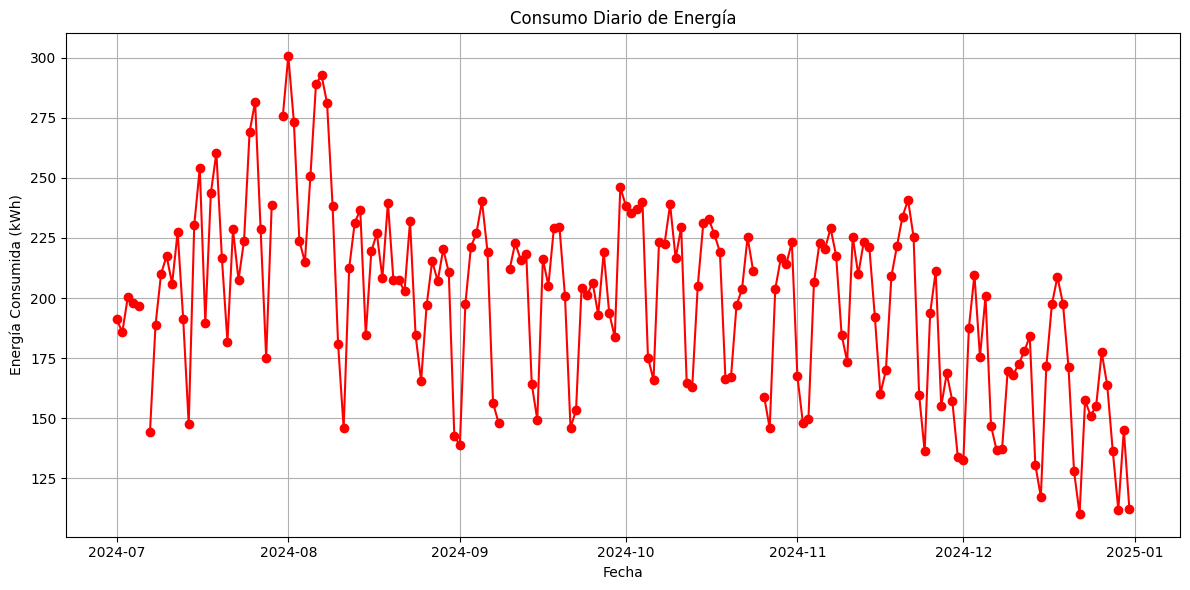

In [ ]:
# Asegurarse de que la columna Fecha sea de tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Crear un gráfico de líneas del consumo diario
plt.figure(figsize=(12, 6))
plt.plot(df["Fecha"], df["Energia Consumida"], color="red", marker='o')

# Añadir etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Energía Consumida (kWh)")
plt.title("Consumo Diario de Energía")
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Limpieza de datos

```
Dame un código que rellena los datos vacíos usando el último valor antes de cada hueco
```

> Claro, para rellenar los valores vacíos utilizando el **último valor disponible antes del hueco** (también conocido como "forward fill"), puedes usar el método `.fillna(method='ffill')` de Pandas. Aquí te dejo el código comentado para hacerlo:

In [11]:
# Rellenar los valores nulos con el último valor anterior (forward fill)
df_ffill = df.fillna(method='ffill')

# Verificar que ya no hay valores nulos
print("Valores nulos después del rellenado (df_ffill):")
print(df_ffill.isnull().sum())


Valores nulos después del rellenado (df_ffill):
Fecha                0
Energia Consumida    0
Temperatura          0
Humedad              0
dtype: int64


/var/folders/kh/vywr4v293s1fmshzbj358gw40000gn/T/ipykernel_3746/716243156.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


```
Dame un código que rellena los datos vacíos usando interpolación
```

> Claro, aquí tienes un código que crea un nuevo DataFrame con los valores nulos **rellenados mediante interpolación lineal**, sin modificar el original:

In [12]:
# Rellenar los valores nulos usando interpolación lineal
df_interp = df.interpolate(method='linear')

# Verificar que ya no hay valores nulos
print("Valores nulos después de la interpolación (df_interp):")
print(df_interp.isnull().sum())

Valores nulos después de la interpolación (df_interp):
Fecha                0
Energia Consumida    0
Temperatura          0
Humedad              0
dtype: int64


```
Dame un código para observar las diferencias entre los 2 métodos de relleno en el mes de Julio
```
> ¡Claro! Para comparar las diferencias entre el método de **forward fill** (`df_ffill`) y **interpolación** (`df_interp`) durante el mes de **julio**, podemos hacer lo siguiente:

1. Filtrar ambos DataFrames por el mes de julio.
2. Calcular la diferencia entre los valores rellenados por ambos métodos.
3. Mostrar los valores distintos para ver cómo varían.

Aquí tienes el código completo:

In [13]:
# Asegurar que 'Fecha' sea tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])
df_ffill["Fecha"] = pd.to_datetime(df_ffill["Fecha"])
df_interp["Fecha"] = pd.to_datetime(df_interp["Fecha"])

# Filtrar los datos del mes de julio
julio_ffill = df_ffill[df_ffill["Fecha"].dt.month == 7].copy()
julio_interp = df_interp[df_interp["Fecha"].dt.month == 7].copy()

# Combinar ambos DataFrames para comparar valores
comparacion = pd.DataFrame({
    "Fecha": julio_ffill["Fecha"],
    "Consumo_Fill": julio_ffill["Energia Consumida"].values,
    "Consumo_Interp": julio_interp["Energia Consumida"].values
})

# Calcular la diferencia entre métodos
comparacion["Diferencia"] = comparacion["Consumo_Interp"] - comparacion["Consumo_Fill"]

# Mostrar las diferencias donde haya discrepancias
diferencias = comparacion[comparacion["Diferencia"] != 0]

# Mostrar resultado
print("Diferencias entre forward fill e interpolación en Julio:")
print(diferencias)

Diferencias entre forward fill e interpolación en Julio:
        Fecha  Consumo_Fill  Consumo_Interp  Diferencia
5  2024-07-06        196.79         170.575     -26.215
29 2024-07-30        238.73         257.140      18.410


```
Dame una gráfico de ambas series temporales en el mes de Julio.
```
> Aquí tienes el gráfico con ambas series temporales para el mes de julio:
> - Forward Fill en rojo punteado con cruces.
> - Interpolación en azul sólido con círculos.

![](img/m6_e3_plot_fill.png)

```
Código para generar la anterior gráfica usando matplotlin
```
> ¡Claro! Aquí tienes el código completo para generar esa gráfica con `matplotlib`, usando los DataFrames con **relleno forward fill** y **interpolación lineal**, y enfocándonos en el mes de **julio**:

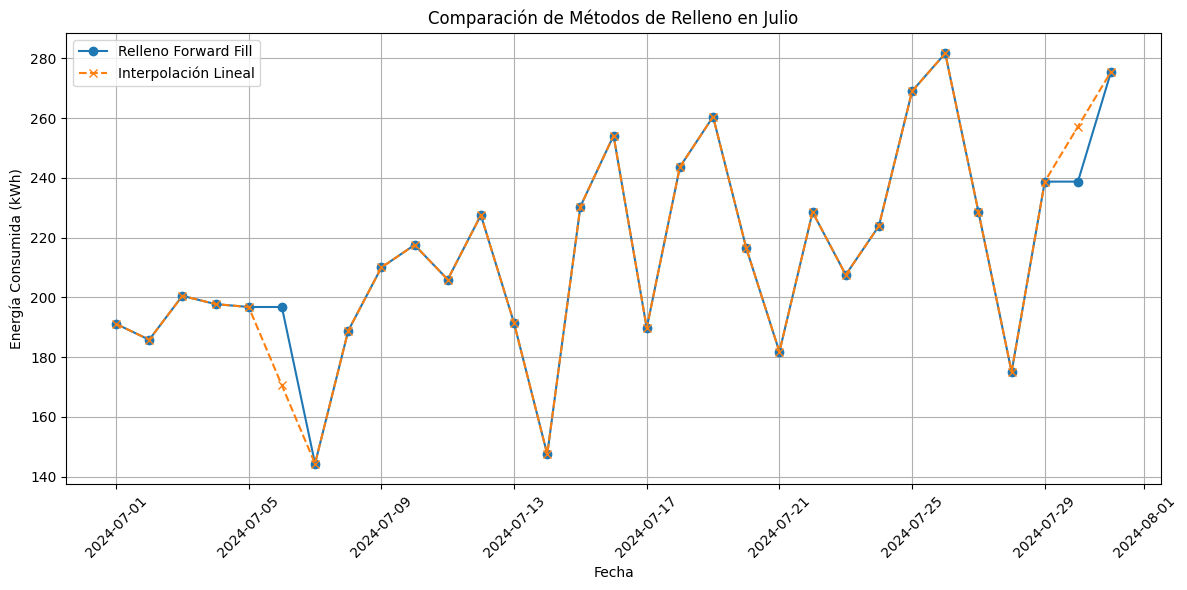

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos del mes de julio
julio_ffill = df_ffill[df_ffill["Fecha"].dt.month == 7].copy()
julio_interp = df_interp[df_interp["Fecha"].dt.month == 7].copy()

# Crear el gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(julio_ffill['Fecha'], julio_ffill['Energia Consumida'],
         label='Relleno Forward Fill', marker='o', linestyle='-')
plt.plot(julio_interp['Fecha'], julio_interp['Energia Consumida'],
         label='Interpolación Lineal', marker='x', linestyle='--')

# Personalización del gráfico
plt.xlabel("Fecha")
plt.ylabel("Energía Consumida (kWh)")
plt.title("Comparación de Métodos de Relleno en Julio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()